In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [2]:
# paths for the three dfs
df_jan_path = "yellow_tripdata_2016-01.csv"
df_feb_path = "yellow_tripdata_2016-02.csv"
df_mar_path = "yellow_tripdata_2016-03.csv"

# load the dataframes
df_jan = dd.read_csv(df_jan_path, assume_missing=True, usecols=['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_feb = dd.read_csv(df_feb_path, assume_missing=True, usecols=['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_mar = dd.read_csv(df_mar_path, assume_missing=True, usecols=['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount'])

In [3]:
# concat the three dataframes as one
df_final = dd.concat([df_jan, df_feb, df_mar], axis=0)

> ### `New york bounding box`:
> - `min_latitude` = 40.60  
> - `max_latitude` = 40.85  
> - `min_longitude` = -74.05  
> - `max_longitude` = -73.70  

In [4]:
# set the values of coordinates
min_latitude = 40.60
max_latitude = 40.85
min_longitude = -74.05
max_longitude = -73.70

In [5]:
# fare amount column
fare_amount = df_final["fare_amount"].compute()

# trip distance column
trip_distance = df_final["trip_distance"].compute()

In [6]:
# Almost 3.5cr records
fare_amount.shape[0] / 10000000

3.4499859

In [7]:
# percentile values for fare amount
percentile_values = np.arange(0.991,1.000, 0.001)
fare_amount.quantile(percentile_values)

0.991        52.00
0.992        52.00
0.993        52.00
0.994        52.00
0.995        54.00
0.996        58.50
0.997        63.00
0.998        69.00
0.999        81.00
1.000    429496.72
Name: fare_amount, dtype: float64

> *We set the maximum fare amount to the 99th percentile*

In [8]:
max_fare_amount_val = fare_amount.quantile(percentile_values).iloc[-2].item()
min_fare_amount_val = 0.50 # Official NYC Taxi minimum fare amount
print(min_fare_amount_val)
print(max_fare_amount_val)

0.5
81.0


In [9]:
# percentile values for trip_distance
trip_distance.quantile(percentile_values)

0.991          18.80
0.992          19.00
0.993          19.30
0.994          19.63
0.995          20.04
0.996          20.51
0.997          21.10
0.998          21.90
0.999          24.43
1.000    19072628.80
Name: trip_distance, dtype: float64

In [10]:
# percentile values for trip_distance
min_trip_distance_val = 0.25 # Official NYC Taxi minimum trip distance
max_trip_distance_val = trip_distance.quantile(percentile_values).iloc[-2].item()

print(min_trip_distance_val)
print(max_trip_distance_val)

0.25
24.43


> *We set the maximum trip distance to the 99th percentile*

In [11]:
# select data points within the given ranges - location based features
df_final = df_final.loc[(df_final["pickup_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_final["pickup_longitude"].between(min_longitude, max_longitude, inclusive="both")) & 
(df_final["dropoff_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_final["dropoff_longitude"].between(min_longitude, max_longitude, inclusive="both")), :]

In [12]:
# select data points within the given ranges - distance and fare amount features
df_final = df_final.loc[(df_final["fare_amount"].between(min_fare_amount_val,max_fare_amount_val,inclusive="both")) & 
(df_final["trip_distance"].between(min_trip_distance_val,max_trip_distance_val,inclusive="both"))]

---

In [13]:
# make a subset of location based columns
location_subset = df_final[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]
location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=82,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [ ]:
# boxplots for location based columns
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(17,10))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i],whis=3)
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2],whis=3)

<Axes: ylabel='trip_distance'>

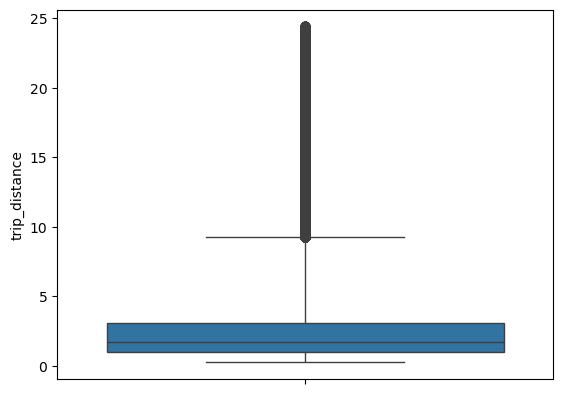

In [ ]:
# boxplot for the trip distance
sns.boxplot(df_final.loc[:,"trip_distance"].compute(), whis=3)

<Axes: ylabel='fare_amount'>

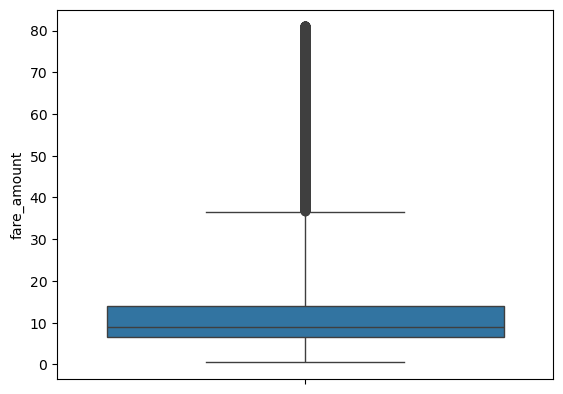

In [ ]:
# boxplot for the fare amount
sns.boxplot(df_final.loc[:,"fare_amount"].compute(), whis=3)

> *The values are in the range but those are not the outliers. The distribution is skewed.*

In [14]:
# save the pickup coordinates dataset
save_path = "location_data.csv"
pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']]

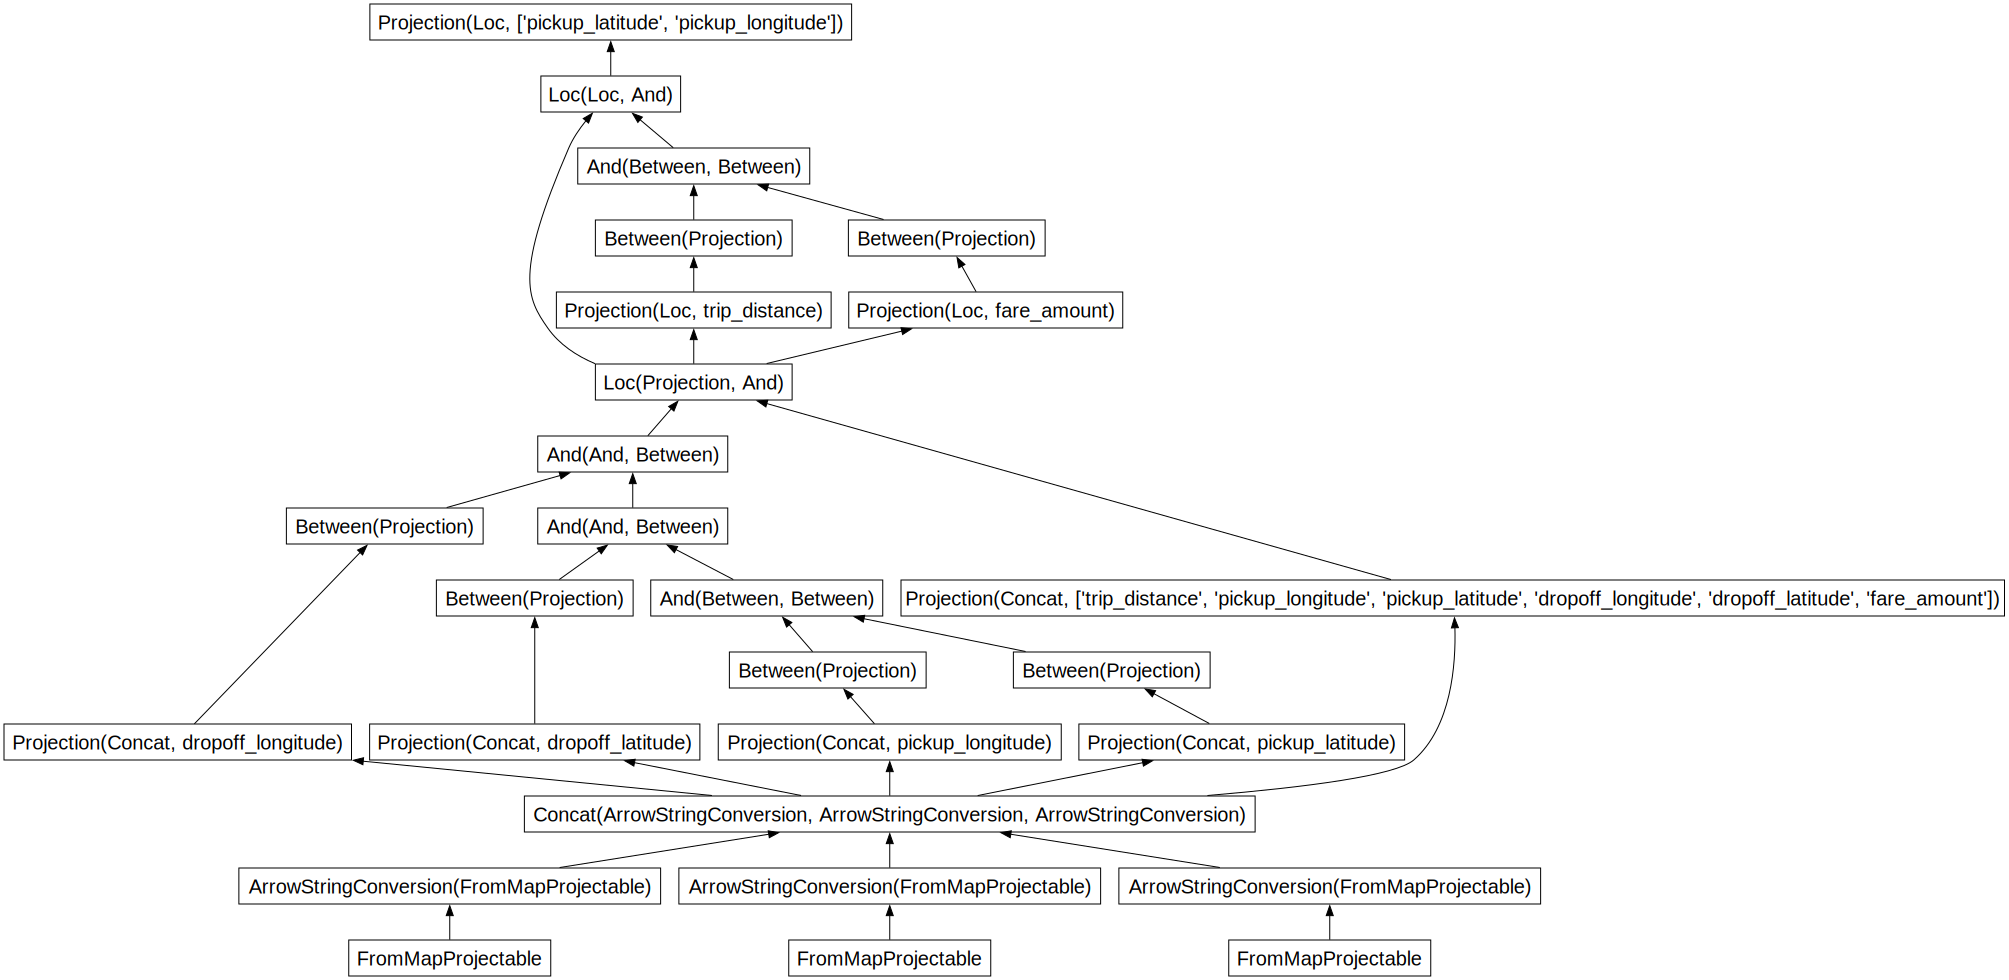

In [15]:
pickup_coord_dataset.visualize()

In [16]:
# form the dataset
pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']].compute()
print("Shape of the dataset is ", pickup_coord_dataset.shape)

Shape of the dataset is  (33234199, 2)


In [17]:
pickup_coord_dataset.sample(10)

,pickup_latitude,pickup_longitude
168712,40.776371,-73.947815
292924,40.762749,-73.968407
346945,40.756859,-73.970062
1315,40.762283,-73.978111
133781,40.768761,-73.981941
213593,40.645428,-73.776764
186687,40.769253,-73.965485
193009,40.712772,-74.007782
58156,40.694584,-73.956123
180069,40.776184,-73.962212


In [19]:
# save the dataset
pickup_coord_dataset.to_csv("location_data.csv", index=False)